![image.png](pear.png)

***

# Welcome to Pear Inc. 

Hi there! 
My name is Robert! You can call me Bob 😉. <br>
I'm the communications officer (fancy title ha!) in our glorious company 😇.
My job is to help facilitate product development and market penetration 🤓. <br>
I spent endless hours talking to engineers, product managers, and  customers 😱  

Since we are a 20 people start-up (All of us have fancy names 😂), I also do some recruiting from time to time 💪 <br>
We are looking for **brave souls who are not afraid of a challenge and will help us** with our new product line of smart t-shirts! 🧐 <br> 

(Our CEO believes that smart t-shirts are the right direction for some reason 😅 I guess if you make something nobody needs, you won't have to sell it 🤓) <br>

Let me tell you a little bit more about our problem that you can help us with:<br>
We are creating a life changing smart t-shirt which has bluetooth and connects to your phone 🥳. They will be customizable outfits through downloaded applications. Our smart t-shirt will be developed with Google Wear OS which is a version of Google's Android operating system designed for smartwatches and other wearables. So users will be able to install custom programs through Google Play Store 🤭. <br> And we will sell them for 999.9$ a piece 💰💰💰<br>
But our engineers wanted to ensure that only Pear Inc. approved programs can be installed on our t-shirts because
market analysis showed that potential customers are afraid of ransomware that will break their "*premium*" t-shirts 🤦‍. So we need an antivirus for approving apps on the fly! <br>However, we don't want to install an off the shelf antivirus to our t-shirts 🤫, because BIG profit margins matter 🏦!

##### Enough chit-chat!
Let's get down to the business of why I contacted you: <br>
Our bright engineers came up with an algorithm that creates compressed signatures for the apps in the Google Play Store. It is called '*manifold averaging generally intelligent compressor*' or as we call it 'MAGIC'. <br>
The engineers told us that the outputs of MAGIC reflect the statistical properties of the uncompressed apps (whatever that may mean! 🤦‍). <br> MAGIC takes a Google Play Store app as an input and outputs a 4 dimensional numerical signature (they called it a vector but calling it a vector is not fancy enough for marketing! 🤪).   

Now, since these signatures are just numbers, an off the shelf antivirus can't work with them (even if it could, we can't install an off the shelf antivirus into our t-shirts -- too much computing power and space is needed). Therefore **we need a light weight proof of concept that takes these signatures as inputs and outputs labels (virus or not) for them.** We eventually want to install your program into our smart t-shirts, where it will scan a Google Play Store app (its signature to be precise!) and stop the app's execution if it thinks the app is a virus! But we are not going so far just yet so you only need to create the pipeline that take the signatures, and output labels for them. Don't worry about the rest, it is just a proof of concept at the end 😉. We are providing the dataset for you to develop your model.

In a nutshell: 
- There 4 dimensional (4 feature) numerical inputs (signatures) with labels!
- We need a simple model that takes these inputs and labels them (Virus, Not a Virus)
- We also need you to evaluate your model. Choose any metric you want, but don't forget to explain why, since I don't know much about this field (that is why we need your help!)

Things to keep in mind:
- There are less 'Virus' in the dataset than 'Not a Virus'. (Naturally!)
- While we call it MAGIC, it still sometimes doesn't work well 🤦‍, so there are signatures with missing features (missing values).
- I don't know much about these things so please show your work, your thinking process and please make it as clear as possible, otherwise I get confused 😵. (Visualizations of the data and comments in your code would be great!)

***
##### Let me describe the dataset, and you are ready to get to work!

It is a CSV file. Each row represents a signature for an app. First 4 columns from left to right represent dimensions (features) and the last column is the label (isVirus: True or False). 

- Visualize the data (so that people like me can understand!)
- Clean up the data (balance it out, impute missing values and so on... depending on the method you are going to use!)
- Visualize the cleaned data (so that people like me can understand the effect of cleaning process!)
- Create a simple model that performs reasonably well. (If it doesn't perform well, comment on why and how to improve it!)
- Evaluate the model with a testset you will create from the dataset. (Pretty plots make things easier to understand)
- Upload your code to a private github repo you can share with us, and invite us (https://github.com/alpsina, https://github.com/ltc0060 and https://github.com/ahmetkoklu) as collaborators so only we can see our super-secret project. 

And you are done! (Don't forget to comment, and show your work please 🤓)


### SOLUTION :


In [48]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import scale, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error, r2_score, roc_auc_score, roc_curve, classification_report

In [49]:
import warnings
warnings.filterwarnings('ignore')

In [90]:
df = pd.read_csv("C:/Users/Ahmet/Desktop/P.I/dataset.csv")

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1999 entries, 0 to 1998
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   feature_1  1897 non-null   float64
 1   feature_2  1899 non-null   float64
 2   feature_3  1893 non-null   float64
 3   feature_4  1897 non-null   float64
 4   isVirus    1999 non-null   bool   
dtypes: bool(1), float64(4)
memory usage: 64.5 KB


In [52]:
df["isVirus"].value_counts()

False    1332
True      667
Name: isVirus, dtype: int64

In [53]:
df.isna().sum()

feature_1    102
feature_2    100
feature_3    106
feature_4    102
isVirus        0
dtype: int64

Text(0.5, 36.58159722222221, 'Columns')

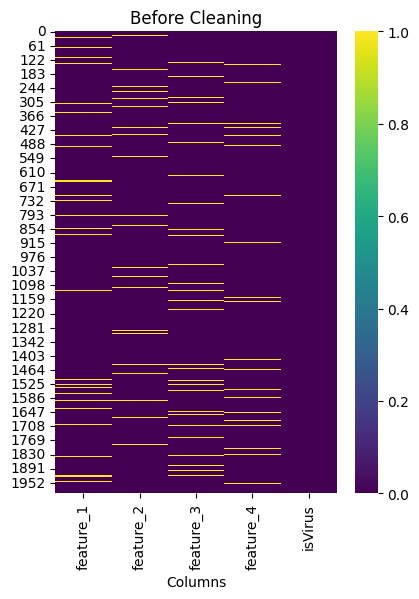

In [54]:
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.title('Before Cleaning')
sns.heatmap(df.isnull(), cmap='viridis')
plt.xlabel('Columns')

#### here we can observe the missing values for each feature value as a yellow stripe

In [55]:
dfd = df.dropna()
df.isna().sum()

feature_1    102
feature_2    100
feature_3    106
feature_4    102
isVirus        0
dtype: int64

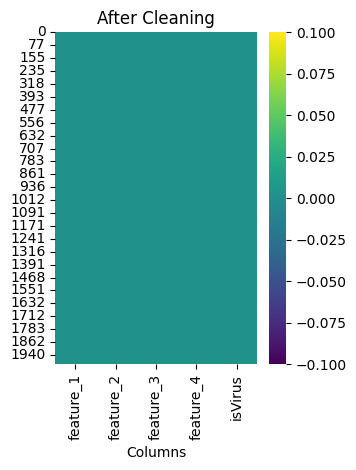

In [56]:
plt.subplot(1, 2, 2)
plt.title('After Cleaning')
sns.heatmap(dfd.isnull(), cmap='viridis')
plt.xlabel('Columns')

plt.tight_layout()
plt.show()

#### Here it is after the missing observations have been deleted, there is no yellow stripe, it looks cleaned

In [57]:
dfd.describe().T

,count,mean,std,min,25%,50%,75%,max
feature_1,1622.00,0.82,1.73,-2.29,-0.56,0.06,2.27,5.93
feature_2,1622.00,1.79,1.60,-7.36,0.99,1.87,2.84,7.55
feature_3,1622.00,2.60,1.46,-5.36,1.66,2.48,3.48,9.26
feature_4,1622.00,0.80,1.77,-3.01,-0.56,0.01,2.28,5.76


#### descriptive statistics look normal I did not observe any anomalies

In [58]:
cols = [col for col in df.columns if "isVirus" not in col] 

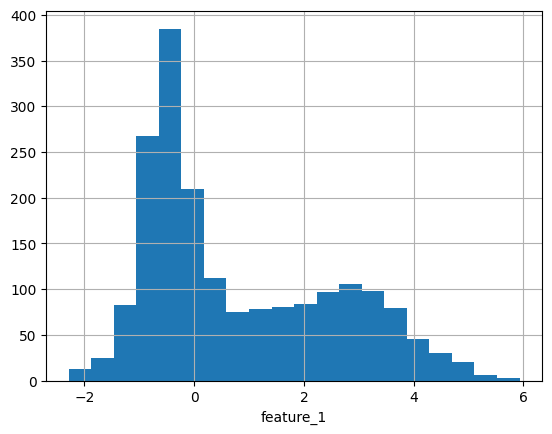

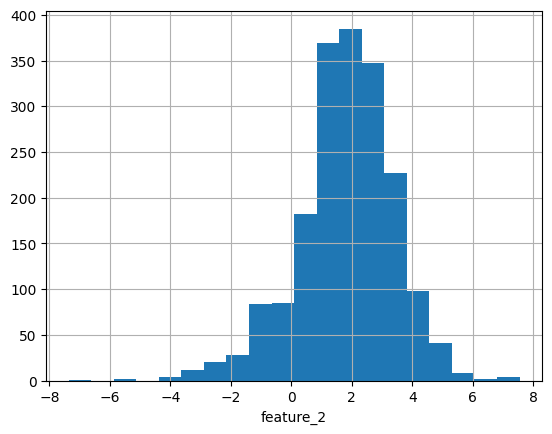

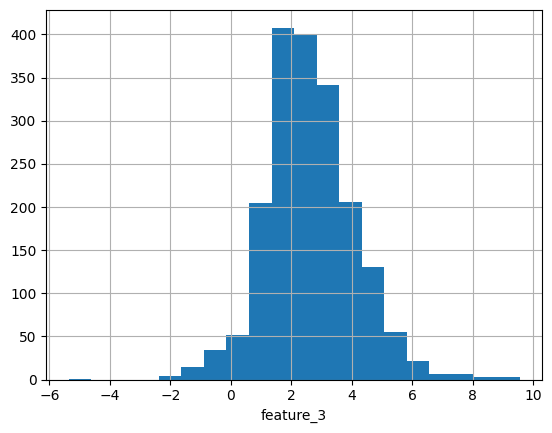

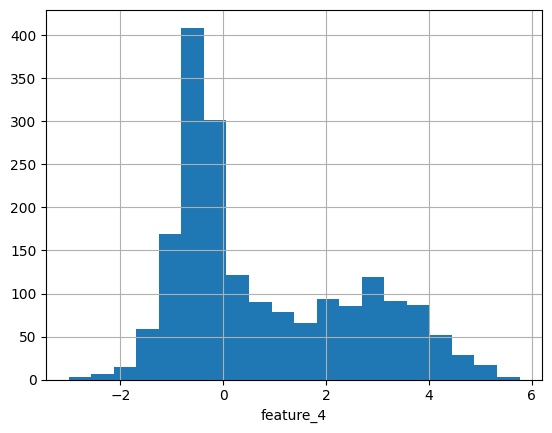

In [59]:
def plot_numerical_col(dataframe, numerical_col):
    dataframe[numerical_col].hist(bins=20)
    plt.xlabel(numerical_col)
    plt.show(block=True)


for col in cols:
    plot_numerical_col(df, col)

#### feature_2 and feature_3 show a normal distribution, while feature_1 and feature_4 show a right skewed distribution.( We want our data to be normally distributed.)

####  If the data set has a right-skewed distribution, you can normalize the data by applying a logarithmic transformation.

<AxesSubplot: >

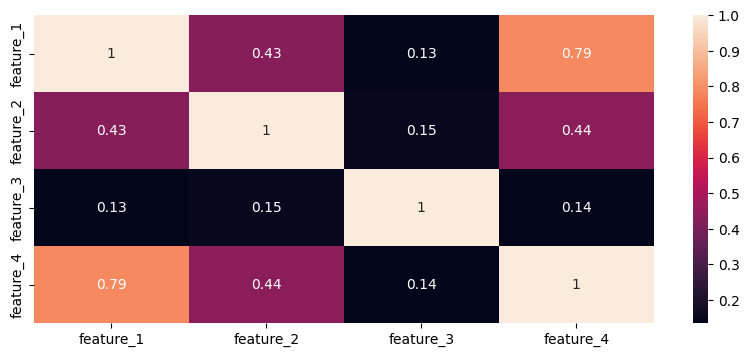

In [60]:
# Let's check the correlation between them;
plt.figure(figsize = (10,4))
sns.heatmap(dfd.drop(["isVirus"], axis = 1).corr(),annot = True)


#### There seems to be a high positive correlation between feature 1 and feature 4, this tells us that there may be a multicollinearity problem, we can decide by looking at the vif values for this, if there is a multicollinearity problem, removing one of the features from the data set may be a solution.

#### There is a weak positive correlation between feature_3 and other features. In this case, feature_3 and the other features may behave independently of each other and not be affected by each other's changes. This can often improve the performance of a model because each feature can represent different aspects of the model. However, it is important to note that this is not always the case because sometimes a low correlation between two features can cause the model to miss some important relationships.

In [91]:
# Indepentend and depentend variables
X = dfd.drop(["isVirus"], axis=1)
y = dfd["isVirus"]

In [62]:
print(y)

0       False
1       False
2       False
3       False
4        True
        ...  
1991    False
1993    False
1994    False
1996    False
1997    False
Name: isVirus, Length: 1622, dtype: bool


In [92]:
# Split the dataset into train and test:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2241)

In [97]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#### For models to approach variables equally. We need to standardize the parameters to give faster and more accurate results.

### Model Building :

#### Logistic Regression

In [65]:
from sklearn.linear_model import LogisticRegression

model_LR = LogisticRegression().fit(X_train, y_train)

##### prediction and error

In [66]:
# Training Set Prediction
y_pred_model_LR_train = model_LR.predict(X_train)
y_pred_model_LR_train[0:10]

array([False,  True,  True, False,  True, False, False,  True, False,
        True])

In [67]:
# Train Set Prediction ---Probability---
y_prob_model_LR_train = model_LR.predict_proba(X_train)
y_prob_model_LR_train[0:10]

array([[0.93901571, 0.06098429],
       [0.3517573 , 0.6482427 ],
       [0.39001324, 0.60998676],
       [0.98048712, 0.01951288],
       [0.33281886, 0.66718114],
       [0.51460872, 0.48539128],
       [0.61500349, 0.38499651],
       [0.46091733, 0.53908267],
       [0.95017339, 0.04982661],
       [0.47055736, 0.52944264]])

In [68]:
# Test Set Prediction
y_pred_model_LR_test = model_LR.predict(X_test)
y_pred_model_LR_test[0:10]

array([False,  True,  True, False, False, False,  True, False, False,
        True])

In [69]:
# Test Set Prediction ---Probability---
y_prob_model_LR_test = model_LR.predict_proba(X_test)
y_prob_model_LR_test[0:10]

array([[0.90194284, 0.09805716],
       [0.4766109 , 0.5233891 ],
       [0.35802971, 0.64197029],
       [0.97820229, 0.02179771],
       [0.93865149, 0.06134851],
       [0.91742209, 0.08257791],
       [0.44383719, 0.55616281],
       [0.73994578, 0.26005422],
       [0.94924093, 0.05075907],
       [0.43257491, 0.56742509]])

##### Training set values :

In [70]:
# Training Set Error ---Confusion Matrix---
confusion_matrix(y_train, y_pred_model_LR_train)

array([[661, 195],
       [229, 212]], dtype=int64)

#### Each cell shows the number of instances counted for a given combination of true class and predicted class. For example, cell (1,1) is the number of instances with true class "Positive" correctly classified as "Positive" by the model, while cell (1,2) is the number of instances with true class "Positive" incorrectly predicted as "Negative" by the model.

In [98]:
# Training Set Performance ---Accuracy Score---
accuracy_score(y_train, y_pred_model_LR_train)

0.6730917501927525

In [94]:
# Training Set Error ---Classification Report---
print(classification_report(y_train, y_pred_model_LR_train))

              precision    recall  f1-score   support

       False       0.74      0.77      0.76       856
        True       0.52      0.48      0.50       441

    accuracy                           0.67      1297
   macro avg       0.63      0.63      0.63      1297
weighted avg       0.67      0.67      0.67      1297



#### Test set values :

In [95]:
# Test Set Error ---Confusion Matrix---

confusion_matrix(y_test, y_pred_model_LR_test)

array([[178,  49],
       [ 60,  38]], dtype=int64)

In [96]:
# Test Set Performance ---Accuracy Score---

accuracy_score(y_test, y_pred_model_LR_test)

0.6646153846153846

In [75]:
# Test Set Error ---Classification Report---

print(classification_report(y_test, y_pred_model_LR_test))

              precision    recall  f1-score   support

       False       0.75      0.78      0.77       227
        True       0.44      0.39      0.41        98

    accuracy                           0.66       325
   macro avg       0.59      0.59      0.59       325
weighted avg       0.65      0.66      0.66       325



#### The area under the ROC curve (ROC AUC) is a metric commonly used to measure the performance of classification models such as logistic regression. The AUC value takes a value between 0 and 1 and indicates the classification ability of the model. An AUC value approaching 1 indicates that the model has an excellent classification ability, while a value approaching 0.5 corresponds to a random classifier.

#### The ROC curve shows the relationship between sensitivity (true positive rate) and specificity (1 - false positive rate). The AUC refers to the area under this curve. 
#### If a model has an AUC value of 0.8, it means that the classification ability of this model is quite good.

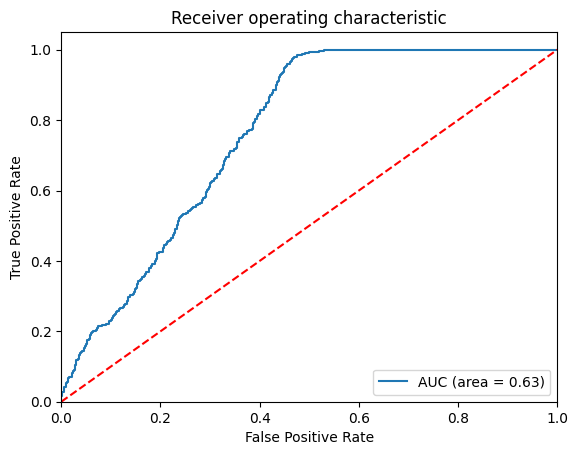

In [76]:
logit_roc_auc = roc_auc_score(y_train, model_LR.predict(X_train))
fpr, tpr, thresholds = roc_curve(y_train, model_LR.predict_proba(X_train)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='AUC (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

#### the area between the blue line and the red line gives us the auc value, which is an evaluation metric like accuracy, the closer to 1 the better

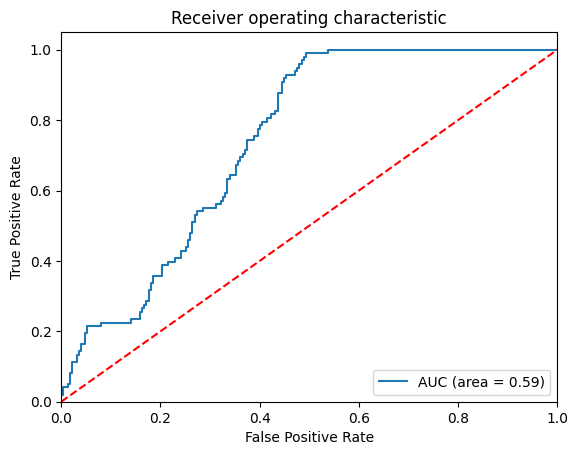

In [77]:
logit_roc_auc = roc_auc_score(y_test, model_LR.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, model_LR.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='AUC (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

### The model test accuracy value we created with linear regression was 0.66, although this value is not bad, it is not a value we want very much, we want the accuracy rate to be around 0.8. Too high an accuracy rate can lead to the problem of overfitting, which means that the value we get is false, that is, the model has not learned the dataset, but has memorized it. To get better results, other machine learning models can be tried, optimization applications can be made on those models, extra features can be added, missing observations can be filled with averages or distance measures, and the data set can be enlarged if it is insufficient.

#### let's see which machine learning models are successful for this dataset with the lazypredict library

In [78]:
from lazypredict.Supervised import LazyClassifier

clf = LazyClassifier(predictions=True)
models, predictions = clf.fit(X_train, X_test, y_train, y_test)


print(models)


100%|██████████| 29/29 [00:03<00:00,  9.41it/s]

[LightGBM] [Info] Number of positive: 441, number of negative: 856
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000118 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1020
[LightGBM] [Info] Number of data points in the train set: 1297, number of used features: 4
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.340015 -> initscore=-0.663226
[LightGBM] [Info] Start training from score -0.663226
                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
ExtraTreesClassifier               0.92               0.92     0.92      0.92   
XGBClassifier                      0.91               0.91     0.91      0.91   
LabelSpreading                     0.91               0.91     0.91      0.91   
LabelPropagation                   0.91               0.91     0.91      0.91   
RandomForestClassifier    

#### generally gives good results for machine learning models

### Let's implement the xgboost model


In [79]:
import xgboost
from xgboost import XGBClassifier
xgb = XGBClassifier(random_state=32).fit(X_train, y_train)

In [80]:
y_pred_xgb_train = xgb.predict(X_train)
y_pred_xgb_train[0:10]

array([0, 0, 0, 0, 1, 0, 1, 0, 0, 0])

In [81]:
y_pred_xgb_test = xgb.predict(X_test)
y_pred_xgb_test[0:10]

array([0, 1, 1, 0, 0, 0, 0, 1, 0, 0])

In [82]:
y_pred_xgb_train_proba = xgb.predict_proba(X_train)
y_pred_xgb_train_proba[0:10]

array([[9.9997419e-01, 2.5817182e-05],
       [9.2616379e-01, 7.3836230e-02],
       [9.8364943e-01, 1.6350577e-02],
       [9.9992466e-01, 7.5352757e-05],
       [6.1711669e-03, 9.9382883e-01],
       [9.1670561e-01, 8.3294414e-02],
       [6.5514445e-03, 9.9344856e-01],
       [9.8664188e-01, 1.3358133e-02],
       [9.9986380e-01, 1.3617429e-04],
       [9.5612639e-01, 4.3873582e-02]], dtype=float32)

In [83]:
y_pred_xgb_test_proba = xgb.predict_proba(X_test)
y_pred_xgb_test_proba[0:10]

array([[9.9890459e-01, 1.0953993e-03],
       [5.3139329e-02, 9.4686067e-01],
       [4.5825076e-01, 5.4174924e-01],
       [9.9992120e-01, 7.8821038e-05],
       [9.9946529e-01, 5.3473719e-04],
       [9.9959445e-01, 4.0557049e-04],
       [9.5060313e-01, 4.9396884e-02],
       [4.6804547e-03, 9.9531955e-01],
       [9.9996436e-01, 3.5634122e-05],
       [8.9333087e-01, 1.0666912e-01]], dtype=float32)

In [84]:
confusion_matrix(y_train, y_pred_xgb_train)

array([[856,   0],
       [  0, 441]], dtype=int64)

#### Here, 1's are predicted as 1 and 0's are predicted as 0 with 100% accuracy. (1 = true 0 = false)

In [85]:
accuracy_score(y_train, y_pred_xgb_train)

1.0

In [86]:
confusion_matrix(y_test, y_pred_xgb_test)

array([[208,  19],
       [  9,  89]], dtype=int64)

In [87]:
accuracy_score(y_test, y_pred_xgb_test)

0.9138461538461539

#### as I said at the end of the linear model part, there is a high value and there is probably an overfitting problem